In [1]:
%cd ..

/Users/ivallesp/PycharmProjects/somnium


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from somnium.core import SOM
from somnium.visualization import plot_components, plot_bmus
from somnium.visualization import plot_umatrix

In [3]:
df = (pd.DataFrame({"weight": np.random.randn(10000)*8+75,
                  "height": np.random.randn(10000)*8+180})
      .assign(BMI = lambda d: 703*d.weight/(d.height**2),
              fat = lambda d: ((d.weight-75)/8)*2 + 23.5 + np.random.randn(10000)*0.5,
              random = np.random.randn(10000)
             ))

data = df.values
names = df.columns

E_Quantization = 0.22203260927858362
E_Topographic = 0.049799999999999955


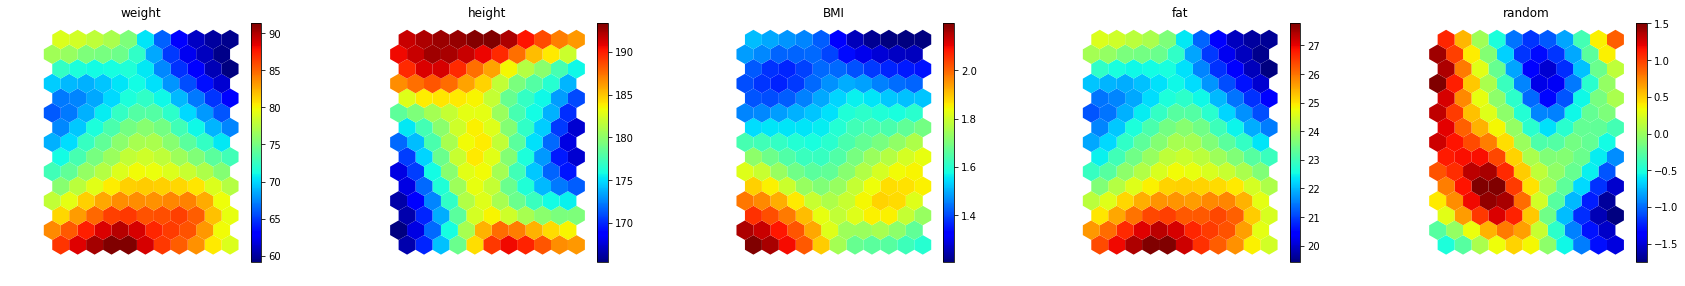

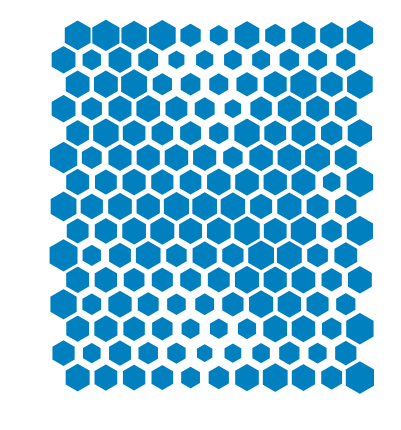

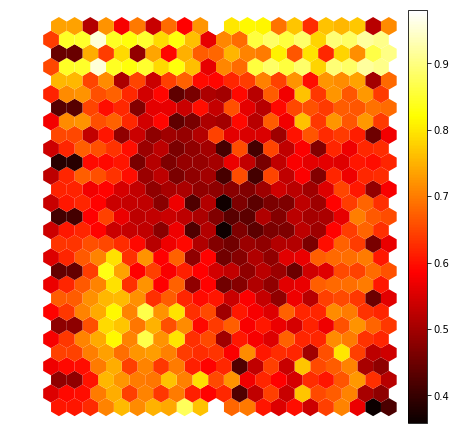

In [5]:
model = SOM(lattice="hexa", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[15, 11])

model.fit(data, 10, 30, 10)
model.fit(data, 30, 10, 3)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model, data, names, figure_width=30, max_subplot_columns=5)

plot_bmus(model, figure_width=10)
plot_umatrix(model, colormap = plt.cm.hot, figure_width=10)

In [ ]:
%debug

In [ ]:
%debug

In [ ]:
[x for row in -1 * np.array(list(range(x))) for x in
     15                    list(zip(np.arange(((row) % 2) * 0.5, y + ((row) % 2) * 0.5), [np.sqrt(3) / 2 * (row)] * y))]

In [ ]:
model.codebook.matrix[:,0].reshape(14, 10)

In [ ]:
model = SOM(lattice="rect", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[14, 10])

model.fit(data, 10, 30, 10)
model.fit(data, 10, 10, 4)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model, data, names, figure_width=30, max_subplot_columns=5)

plot_bmus(model, figure_width=10)

plot_umatrix(model, colormap = plt.cm.hot, figure_width=10)

In [ ]:
codebook = model.codebook.matrix.reshape(14, 10, 5)

In [ ]:
codebook.shape

In [ ]:
(codebook[:-1, :, :] - codebook[1:, :, :]).shape